In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Simple RNN

In [47]:
# 0.데이터 생성

# 1000개 시계열 데이터 생성
x = np.arange(0, 100, 0.1) 
y = 0.5*np.sin(2*x) - np.cos(x/2.0)

seq_data = y.reshape(-1,1)
# RNN 입력에 필수적인 (batch_size, time steps, input_dim) 3차원 텐서 형태의 
# 입력 데이터로 쉽게 만들기 위해서 reshape(-1,1) 사용하여
# (1000, 1) 행렬로 바꾸어줌

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


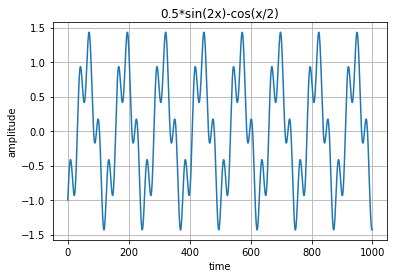

In [48]:
plt.grid()
plt.title('0.5*sin(2x)-cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [49]:
def seq2dataset(seq, window, horizon):
    X = []
    Y = []
    
    for i in range(len(seq)-(window + horizon) + 1):
        x = seq[i : (i + window)]
        y = (seq[i+window + horizon -1])
        
        X.append(x)
        Y.append(y)
        
    return np.array(X), np.array(Y)

In [50]:
# 1.입력 데이터 x, 정답 데이터 y 생성
w = 20 # window size 
h = 1 # horizon factor

X, Y = seq2dataset(seq_data, w, h)

print(x.shape, Y.shape)

(1000,) (980, 1)


In [52]:
# 3. 트레이닝 데이터 / 테스트 데이터 분리

split_ratio = 0.8

split = int(split_ratio*len(X))

X_train = X[0:split]
y_train = Y[0:split]

X_test = X[split:]
y_test = Y[split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(784, 20, 1) (784, 1)
(196, 20, 1) (196, 1)


In [57]:
# 4. Simple RNN 모델 구축

model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(units=128, 
                                    activation = 'tanh', 
                                    input_shape = X_train[0].shape)) # input_shape = (20,1)
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [60]:
# 모델 컴파일
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])

In [63]:
# 모델 학습
hist = model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
20/20 [==============================] - 3s 56ms/step - loss: 0.0690 - mse: 0.0690 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2/10
20/20 [==============================] - 0s 16ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3/10
20/20 [==============================] - 0s 15ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 8.8932e-04 - val_mse: 8.8932e-04
Epoch 4/10
20/20 [==============================] - 0s 15ms/step - loss: 6.9146e-04 - mse: 6.9146e-04 - val_loss: 4.4992e-04 - val_mse: 4.4992e-04
Epoch 5/10
20/20 [==============================] - 0s 16ms/step - loss: 3.4686e-04 - mse: 3.4686e-04 - val_loss: 2.3705e-04 - val_mse: 2.3705e-04
Epoch 6/10
20/20 [==============================] - 0s 17ms/step - loss: 2.7714e-04 - mse: 2.7714e-04 - val_loss: 2.3610e-04 - val_mse: 2.3610e-04
Epoch 7/10
20/20 [==============================] - 0s 19ms/step - loss: 1.8818e-04 - mse: 1.8818e-04 - val_loss: 1.2272e-04 - val_mse: 1.2272e-04
Epoch 8/10


In [64]:
# 모델 평가
pred = model.predict(X_test )
print(pred.shape)

(196, 1)


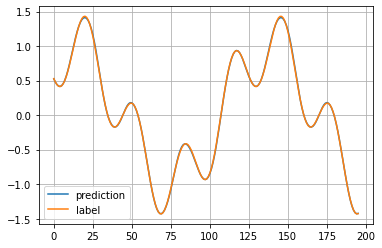

In [65]:
plt.plot(pred, label = 'prediction')
plt.plot(y_test, label = 'label')
plt.grid()
plt.legend(loc = 'best')

plt.show()

--------
## LSTM
- 20강
- 삼성전자 주식 가격 대신
- 애플 주식가격 : 2000-01-03 ~ 2022-08-31
- 참조 붓꼬리두더지 : p.471 index_col =  'Date', parse_dates= True 및 rolling연산(MA) 

In [135]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [148]:
raw_df = pd.read_csv('AAPL.csv', index_col =  'Date', parse_dates = True)
raw_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400


In [91]:
raw_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78823500
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.380005,73314000
2022-08-30,162.130005,162.559998,157.720001,158.910004,158.910004,77906200
2022-08-31,160.309998,160.580002,157.139999,157.220001,157.220001,87700100


In [92]:
raw_df.keys()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#### simple Moving Average
- 참조 사이트 https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/

In [86]:
type(raw_df['Adj Close'])

pandas.core.series.Series

In [87]:
df_close = raw_df['Adj Close'].to_frame()
type(appl_df)

# .to_frame() : to convert pandas series -> dataframe

pandas.core.frame.DataFrame

In [149]:
appl_df = raw_df.copy()

appl_df['3MA'] = raw_df['Close'].rolling(3).mean()
appl_df['5MA'] = raw_df['Close'].rolling(5).mean()
appl_df.head()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
Date,,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800,NaN,NaN
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600,NaN,NaN
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600,0.947731,NaN
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800,0.897321,NaN
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400,0.888393,0.91596


<AxesSubplot:xlabel='Date'>

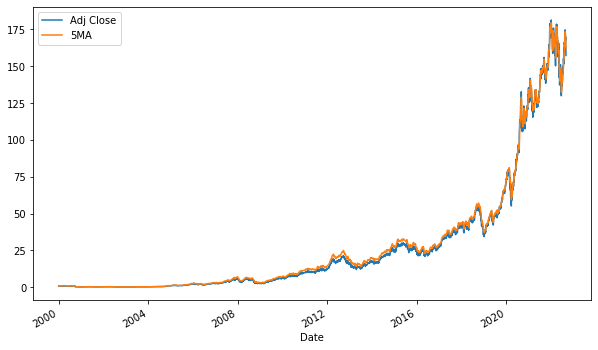

In [98]:
appl_df[['Adj Close', '5MA']].plot(label = 'APPL', figsize = (10,6))

-----
#### 0. 데이터 로드 및 분포 확인

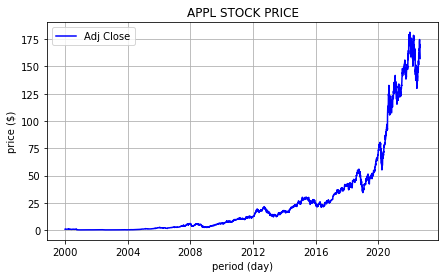

In [100]:
plt.figure(figsize = (7,4))

plt.title('APPL STOCK PRICE')
plt.ylabel('price ($)')
plt.xlabel('period (day)')
plt.grid()

plt.plot(appl_df['Adj Close'], label = 'Adj Close', color = 'b')
plt.legend(loc = 'best')

plt.show()

#### 전처리
- 결측치 missing value

In [101]:
appl_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          2
5MA          4
dtype: int64

In [150]:
appl_df.loc[appl_df['5MA'].isnull()]

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
Date,,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800,NaN,NaN
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600,NaN,NaN
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600,0.947731,NaN
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800,0.897321,NaN


In [ ]:
# appl에는 필요 없었지만 삼성주식에는 필요할 듯 보이는 코드
# raw_df['Volume'] = raw_df['Volume'].replace(0, np.nan)

In [104]:
# 각 column에 0 개수 확인

for col in appl_df.columns:
    missing_rows = appl_df.loc[appl_df[col] == 0].shape[0]
    print(col + ' : '+  str(missing_rows))

Open : 0
High : 0
Low : 0
Close : 0
Adj Close : 0
Volume : 0
3MA : 0
5MA : 0


In [151]:
appl_df = appl_df.dropna()
appl_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

#### train / test data split
- 박성호의 방식은 조금 순서가 잘못된 것 같아서 내가 배운데로 바꿈
- train / test split 부터 한 후에
- train 데이터 정규화 시킨 것을 
- test 데이터에 적용

In [199]:
feature_cols = ['Adj Close', '3MA', '5MA'] # 입력 데이터
label_cols = ['Adj Close'] # 정답 데이터

feature_df = pd.DataFrame(appl_df, columns = feature_cols)
label_df = pd.DataFrame(appl_df, columns = label_cols)

print(feature_df.head())
print(label_df.head())

            Adj Close       3MA       5MA
Date                                     
2000-01-07   0.758538  0.888393  0.915960
2000-01-10   0.745197  0.869792  0.890625
2000-01-11   0.707080  0.863095  0.873214
2000-01-12   0.664674  0.826451  0.843192
2000-01-13   0.737573  0.823475  0.846317
            Adj Close
Date                 
2000-01-07   0.758538
2000-01-10   0.745197
2000-01-11   0.707080
2000-01-12   0.664674
2000-01-13   0.737573


In [121]:
type(feature_df)

pandas.core.frame.DataFrame

In [110]:
# way1
# 해당 방식은 GRU에서 할 거임

# split = -200

# X_train = feature_df[0:split]
# y_train = label_df[0:split]

# X_test = feature_df[split:]
# y_test = label_df[split:]

In [116]:
type(X_test)

# 따라서 다음 코드 에러 뜸

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

list

#### train/test split way2

In [200]:
# way2
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test  = \
                    train_test_split(feature_df,label_df, test_size = 0.2, shuffle = False)

# y_train, y_test = train_test_split(label_df, test_size = 0.2, shuffle = False)

In [201]:
type(X_train)

pandas.core.frame.DataFrame

#### 정규화 (normalization)

In [202]:
appl_df.keys()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '3MA', '5MA'], dtype='object')

In [203]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 정규화 대상 columns
# scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '3MA', '5MA'] 

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# 질문 :  regression 할 때는 y data도 표준화 해야하는 걸까?
# scaled_y_train = scaler.fit_transform(y_train)
# scaled_y_test = scaler.fit(y_test)

In [195]:
type(scaled_X_train)

numpy.ndarray

In [196]:
type(scaled_X_test)

numpy.ndarray

In [197]:
type(y_train)

numpy.ndarray

- 질문 : regression 할 때는 y data도 표준화 해야하는 걸까? -> 아닐거라고 생각

In [204]:
# 딥러닝 학습을 위해 DataFrame -> numpy 변환
# scaled_X_train = scaled_X_train.to_numpy()
# scaled_X_test = scaled_X_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [205]:
# 입력 파라미터 feature, label -> numpy type

def make_sequence_dataset(feature, label, window_size):
    
    feature_list =[]
    label_list = []
    
    for i in range(len(feature) - window_size):
        
        feature_list.append(feature[i:i + window_size])
        label_list.append(label[i + window_size])
                          
    return np.array(feature_list), np.array(label_list)

In [206]:
window_size = 40

X_train_df, y_train_df = make_sequence_dataset(scaled_X_train, y_train, window_size)
X_test_df, y_test_df = make_sequence_dataset(scaled_X_test, y_test, window_size)

In [140]:
print(X_train_df.shape, y_train_df.shape)
print(X_test_df.shape, y_test_df.shape)

(4519, 40, 3) (4519, 1)
(1100, 40, 3) (1100, 1)


#### LSTM 모델 구축

In [207]:
model = keras.models.Sequential()

model.add(keras.layers.LSTM(128,
                            activation = 'tanh',
                            input_shape = X_train_df[0].shape))
model.add(keras.layers.Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               67584     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 67,713
Trainable params: 67,713
Non-trainable params: 0
_________________________________________________________________


In [211]:
# 모델 컴파일
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])

# 조기종료
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

# 모델학습
model.fit(X_train_df, y_train_df, 
#           validation_split = 0.2, 
#           shuffle = False, 
          epochs = 100, batch_size = 16, callbacks=[early_stop])

Epoch 1/100
283/283 [==============================] - 19s 48ms/step - loss: 45.4788 - mse: 45.4788
Epoch 2/100
283/283 [==============================] - 14s 50ms/step - loss: 4.0990 - mse: 4.0990
Epoch 3/100
283/283 [==============================] - 11s 39ms/step - loss: 1.6538 - mse: 1.6538
Epoch 4/100
283/283 [==============================] - 11s 38ms/step - loss: 1.0164 - mse: 1.0164
Epoch 5/100
283/283 [==============================] - 11s 38ms/step - loss: 0.8113 - mse: 0.8113
Epoch 6/100
283/283 [==============================] - 16s 55ms/step - loss: 0.5504 - mse: 0.5504
Epoch 7/100
283/283 [==============================] - 19s 67ms/step - loss: 0.6613 - mse: 0.6613
Epoch 8/100
283/283 [==============================] - 13s 48ms/step - loss: 0.5904 - mse: 0.5904
Epoch 9/100
283/283 [==============================] - 14s 49ms/step - loss: 0.3259 - mse: 0.3259
Epoch 10/100
283/283 [==============================] - 13s 46ms/step - loss: 0.3674 - mse: 0.3674
Epoch 11/100
283/

#### APPL 주가 예측

In [212]:
pred = model.predict(X_test_df)

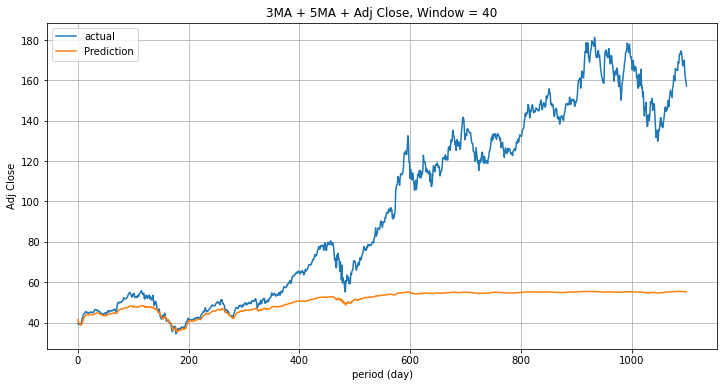

In [213]:
plt.figure(figsize = (12,6))

plt.title('3MA + 5MA + Adj Close, Window = 40')
plt.ylabel('Adj Close')
plt.xlabel('period (day)')
plt.grid()

plt.plot(y_test_df, label = 'actual')
plt.plot(pred, label = 'Prediction')
plt.legend(loc = 'best')

plt.show()

- 300일 이후로는 예측 성능이 좋아보이지 않음

## GRU
- 200일에 대해서만 예측해보려고함

In [236]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [227]:
# 데이터 불러오기
raw_df = pd.read_csv('AAPL.csv', index_col =  'Date', parse_dates = True)
raw_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400


In [237]:
# MA COL cnrk
appl_df = raw_df.copy()

appl_df['3MA'] = raw_df['Close'].rolling(3).mean()
appl_df['5MA'] = raw_df['Close'].rolling(5).mean()
appl_df.head()


,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
Date,,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800,NaN,NaN
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600,NaN,NaN
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600,0.947731,NaN
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800,0.897321,NaN
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400,0.888393,0.91596


In [238]:
# 결측치 확인
appl_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          2
5MA          4
dtype: int64

In [239]:
# 결측치 drop
appl_df = appl_df.dropna()
appl_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

In [282]:
# X, y 나누기

feature_cols = ['Adj Close', '3MA', '5MA'] # 입력 데이터
label_cols = ['Adj Close'] # 정답 데이터

feature_df = pd.DataFrame(appl_df, columns = feature_cols)
label_df = pd.DataFrame(appl_df, columns = label_cols)

print(feature_df.head())
print(label_df.head())

            Adj Close       3MA       5MA
Date                                     
2000-01-07   0.758538  0.888393  0.915960
2000-01-10   0.745197  0.869792  0.890625
2000-01-11   0.707080  0.863095  0.873214
2000-01-12   0.664674  0.826451  0.843192
2000-01-13   0.737573  0.823475  0.846317
            Adj Close
Date                 
2000-01-07   0.758538
2000-01-10   0.745197
2000-01-11   0.707080
2000-01-12   0.664674
2000-01-13   0.737573


In [283]:
type(feature_df)

pandas.core.frame.DataFrame

In [284]:
# train / test data split
split = -200

X_train = feature_df[0:split]
y_train = label_df[0:split]

X_test = feature_df[split:]
y_test = label_df[split:]

In [285]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [286]:
# 정규화 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 정규화 대상 columns
# scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '3MA', '5MA'] 

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [276]:
print(type(scaled_X_train))
print(type(scaled_X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [288]:
# 딥러닝 학습을 위해 DataFrame -> numpy 변환

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(type(scaled_X_train))
print(type(scaled_X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [289]:
# 입력 파라미터 feature, label -> numpy type

def make_sequence_dataset(feature, label, window_size):
    
    feature_list =[]
    label_list = []
    
    for i in range(len(feature) - window_size):
        
        feature_list.append(feature[i:i + window_size])
        label_list.append(label[i + window_size])
                          
    return np.array(feature_list), np.array(label_list)

In [290]:
window_size = 40

X_train_df, y_train_df = make_sequence_dataset(scaled_X_train, y_train, window_size)
X_test_df, y_test_df = make_sequence_dataset(scaled_X_test, y_test, window_size)

print(X_train_df.shape, y_train_df.shape)
print(X_test_df.shape, y_test_df.shape)

(5459, 40, 3) (5459, 1)
(160, 40, 3) (160, 1)


In [291]:
print(type(X_train_df))
print(type(X_test_df))
print(type(y_train_df))
print(type(y_test_df))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### 모델 구축

In [294]:
model = keras.models.Sequential()

model.add(keras.layers.GRU(256, activation= 'tanh', 
                          input_shape = X_train_df[0].shape))
model.add(keras.layers.Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               200448    
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 200,705
Trainable params: 200,705
Non-trainable params: 0
_________________________________________________________________


In [295]:
# 모델 컴파일
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])

# 조기종료
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

# 모델학습
model.fit(X_train_df, y_train_df, 
#           validation_split = 0.2, 
#           shuffle = False, 
          epochs = 100, batch_size = 16, callbacks=[early_stop])

Epoch 1/100
342/342 [==============================] - 41s 95ms/step - loss: 917.6163 - mse: 917.6163
Epoch 2/100
342/342 [==============================] - 32s 92ms/step - loss: 245.7177 - mse: 245.7177
Epoch 3/100
342/342 [==============================] - 30s 87ms/step - loss: 71.2539 - mse: 71.2539
Epoch 4/100
342/342 [==============================] - 31s 90ms/step - loss: 43.3682 - mse: 43.3682
Epoch 5/100
342/342 [==============================] - 31s 90ms/step - loss: 27.7135 - mse: 27.7135
Epoch 6/100
342/342 [==============================] - 31s 92ms/step - loss: 19.8160 - mse: 19.8160
Epoch 7/100
342/342 [==============================] - 32s 93ms/step - loss: 21.6364 - mse: 21.6364
Epoch 8/100
342/342 [==============================] - 32s 95ms/step - loss: 14.4454 - mse: 14.4454
Epoch 9/100
342/342 [==============================] - 32s 93ms/step - loss: 11.4323 - mse: 11.4323
Epoch 10/100
342/342 [==============================] - 30s 89ms/step - loss: 8.2663 - mse: 8.26

#### APPL 주가 예측

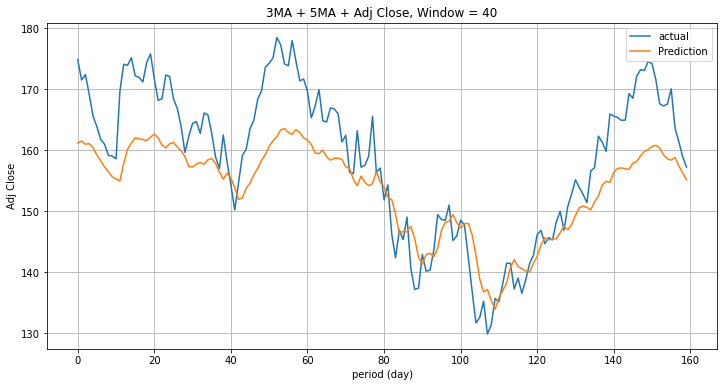

In [296]:
pred = model.predict(X_test_df)


# 그래프
plt.figure(figsize = (12,6))

plt.title('3MA + 5MA + Adj Close, Window = 40')
plt.ylabel('Adj Close')
plt.xlabel('period (day)')
plt.grid()

plt.plot(y_test_df, label = 'actual')
plt.plot(pred, label = 'Prediction')
plt.legend(loc = 'best')

plt.show()